In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import os
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [33]:
data = pd.read_excel("data/sentiment.xlsx").set_index("Date")
data.head(5)

,Open,High,Low,Close,Volume,RSI,EMA34_Fast,EMA89_Medium,EMA200_Slow,PredictNextClose,neg,neu,pos,compound
Date,,,,,,,,,,,,,,
2016-10-17,111.238645,111.485760,110.886982,111.029549,14182700,45.950068,111.477528,108.938518,103.777025,112.018021,0.029,0.919,0.053,0.7059
2016-10-18,112.350671,112.540762,111.960997,112.018021,19276700,52.174011,111.508413,109.006952,103.859025,112.008499,0.041,0.894,0.064,0.4404
2016-10-19,111.932463,112.170071,111.808909,112.008499,13702900,52.112079,111.536990,109.073653,103.940115,111.875450,0.092,0.782,0.126,0.8271
2016-10-20,111.894463,112.122565,111.229156,111.875450,18132200,51.202132,111.556330,109.135915,104.019073,112.293633,0.038,0.872,0.090,0.7906
2016-10-21,111.960982,112.360163,111.590314,112.293633,15707800,53.912206,111.598462,109.206086,104.101407,113.643250,0.047,0.782,0.172,0.9916


In [34]:
data[["Open", "High"]]

,Open,High
Date,,
2016-10-17,111.238645,111.485760
2016-10-18,112.350671,112.540762
2016-10-19,111.932463,112.170071
2016-10-20,111.894463,112.122565
2016-10-21,111.960982,112.360163
...,...,...
2023-10-23,353.260010,359.260010
2023-10-24,357.510010,359.910004
2023-10-25,356.700012,356.880005


##### TRAIN DATE: START -> 2022-06-30
##### VAL DATE: 2022-07-01 -> 2023-02-21
##### TEST DATE: 2023-02-22 -> END 

In [35]:
train_data = data.loc[:"2022-06-30"]
train_data

,Open,High,Low,Close,Volume,RSI,EMA34_Fast,EMA89_Medium,EMA200_Slow,PredictNextClose,neg,neu,pos,compound
Date,,,,,,,,,,,,,,
2016-10-17,111.238645,111.485760,110.886982,111.029549,14182700,45.950068,111.477528,108.938518,103.777025,112.018021,0.029,0.919,0.053,0.7059
2016-10-18,112.350671,112.540762,111.960997,112.018021,19276700,52.174011,111.508413,109.006952,103.859025,112.008499,0.041,0.894,0.064,0.4404
2016-10-19,111.932463,112.170071,111.808909,112.008499,13702900,52.112079,111.536990,109.073653,103.940115,111.875450,0.092,0.782,0.126,0.8271
2016-10-20,111.894463,112.122565,111.229156,111.875450,18132200,51.202132,111.556330,109.135915,104.019073,112.293633,0.038,0.872,0.090,0.7906
2016-10-21,111.960982,112.360163,111.590314,112.293633,15707800,53.912206,111.598462,109.206086,104.101407,113.643250,0.047,0.782,0.172,0.9916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,285.290061,292.527924,285.052114,292.101562,58422300,50.077071,294.387173,315.945148,332.347639,289.959961,0.114,0.810,0.076,-0.9103
2022-06-27,293.479723,294.054771,288.809834,289.959961,54151500,48.833589,294.134190,315.367699,331.925871,281.125824,0.075,0.835,0.090,0.7609
2022-06-28,290.505269,293.132700,280.937439,281.125824,61609800,44.004289,293.390854,314.606769,331.420398,281.383606,0.065,0.849,0.085,0.5615


In [36]:
validate_data = data.loc["2022-07-01": "2023-02-21"]
validate_data

,Open,High,Low,Close,Volume,RSI,EMA34_Fast,EMA89_Medium,EMA200_Slow,PredictNextClose,neg,neu,pos,compound
Date,,,,,,,,,,,,,,
2022-07-01,276.574897,280.124402,274.671232,279.727814,56675100,43.644358,291.165202,312.328119,329.890719,284.516693,0.095,0.847,0.058,-0.9050
2022-07-05,275.940349,284.635667,274.393634,284.516693,61829300,47.125004,290.785287,311.710087,329.439236,286.341034,0.116,0.792,0.092,-0.7482
2022-07-06,284.903398,288.472752,283.158374,286.341034,63194700,48.425160,290.531330,311.146331,329.010399,292.468384,0.031,0.790,0.179,0.9932
2022-07-07,287.163931,293.182255,287.163931,292.468384,56620100,52.617826,290.642018,310.731265,328.646796,292.835266,0.075,0.792,0.133,0.9087
2022-07-08,289.593089,294.223340,288.641271,292.835266,59895500,52.863650,290.767347,310.333576,328.290463,286.578979,0.035,0.828,0.137,0.9730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-14,301.571039,306.379992,299.599650,305.414215,64079100,62.025154,290.197701,285.357433,294.296447,307.753967,0.064,0.856,0.080,0.7059
2023-02-15,303.572245,307.923210,302.875311,307.753967,43100600,63.530794,291.200916,285.855133,294.430353,301.979218,0.054,0.859,0.087,0.9012
2023-02-16,303.054532,307.086883,301.829877,301.979218,59498600,57.501951,291.816819,286.213446,294.505466,299.848541,0.086,0.782,0.132,0.9372


In [37]:
test_data = data.loc["2023-02-22":]
test_data

,Open,High,Low,Close,Volume,RSI,EMA34_Fast,EMA89_Medium,EMA200_Slow,PredictNextClose,neg,neu,pos,compound
Date,,,,,,,,,,,,,,
2023-02-22,293.337012,295.069425,291.285985,292.968628,51389200,49.278588,292.340893,286.795266,294.524989,295.527435,0.073,0.864,0.063,-0.3873
2023-02-23,296.672421,296.831728,291.276011,295.527435,69294400,51.561265,292.522981,286.989314,294.534963,290.579071,0.041,0.817,0.142,0.9785
2023-02-24,290.489467,291.694189,288.786891,290.579071,74332000,47.163367,292.411901,287.069087,294.495601,292.660004,0.036,0.890,0.074,0.8078
2023-02-27,293.785088,295.198887,292.062610,292.660004,48995000,49.118781,292.426078,287.193329,294.477337,292.281647,0.020,0.907,0.073,0.9411
2023-02-28,292.022769,294.830496,291.684253,292.281647,48243100,48.767189,292.417825,287.306403,294.455489,289.931915,0.085,0.796,0.118,0.8198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23,353.260010,359.260010,351.119995,355.670013,60665200,40.584342,364.218431,360.699299,344.352046,359.130005,0.022,0.873,0.104,0.9830
2023-10-24,357.510010,359.910004,355.790009,359.130005,47082100,44.954889,363.927663,360.664425,344.499090,350.339996,0.075,0.778,0.147,0.9886
2023-10-25,356.700012,356.880005,349.750000,350.339996,71190500,37.455470,363.151225,360.434994,344.557208,343.660004,0.048,0.819,0.132,0.9941


In [38]:
scaler1 = MinMaxScaler(feature_range=(0,1))
train_data.iloc[:,:9] = scaler1.fit_transform(train_data.iloc[:,:9])
validate_data.iloc[:,:9] = scaler1.transform(validate_data.iloc[:,:9])
test_data.iloc[:,:9] = scaler1.transform(test_data.iloc[:,:9])

c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py

In [39]:
# scaler2 = MinMaxScaler(feature_range=(0,1))
# train_data_scaled = scaler2.fit_transform(train_data.iloc[:,12:])
# validate_data_scaled = scaler2.transform(validate_data.iloc[:,12:])
# test_data_scaled = scaler2.transform(test_data.iloc[:,12:])

In [40]:
# n_components = 20
# pca = PCA(n_components=n_components)
# train_data_scaled = pca.fit_transform(train_data.iloc[:, 12:])
# validate_data_scaled = pca.transform(validate_data.iloc[:, 12:])
# test_data_scaled = pca.transform(test_data.iloc[:, 12:])
train_data_scaled = train_data.iloc[:, 10:]
validate_data_scaled = validate_data.iloc[:, 10:]
test_data_scaled = test_data.iloc[:, 10:]

In [41]:
# explained_variance = pca.explained_variance_ratio_
# plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance')
# plt.title('Scree Plot')
# plt.show()

In [42]:
# cumulative_explained_variance = np.cumsum(explained_variance)
# plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Cumulative Explained Variance')
# plt.show()

In [43]:
train = np.concatenate([train_data[["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
]].values, train_data_scaled], axis=1)
validate = np.concatenate([validate_data[["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
]].values, validate_data_scaled], axis=1)
test = np.concatenate([test_data[["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
]].values, test_data_scaled], axis=1)

In [44]:
train_data = pd.DataFrame(train)
train_data = train_data.rename(columns=dict(zip(train_data.columns[:9], ["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
])))
validate_data = pd.DataFrame(validate)
validate_data = validate_data.rename(columns=dict(zip(validate_data.columns[:9], ["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
])))
test_data = pd.DataFrame(test)
test_data = test_data.rename(columns=dict(zip(test_data.columns[:9], ["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
])))

In [45]:
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  # Set a fixed value for the hash seed
  os.environ["PYTHONHASHSEED"] = str(seed)
  print(f"Random seed set as {seed}")

In [46]:
set_seed(0)

Random seed set as 0


In [47]:
# train.to_excel("data/final_data/train.xlsx")
# validate.to_excel("data/final_data/validate.xlsx")
# test.to_excel("data/final_data/test.xlsx")

In [48]:
# train_data = pd.read_excel("data/final_data/train.xlsx").iloc[:, 1:]
# train_data.head(10)

In [49]:
# validate_data = pd.read_excel("data/final_data/validate.xlsx").iloc[:, 1:]
# validate_data.head(5)

In [50]:
# test_data = pd.read_excel("data/final_data/test.xlsx").iloc[:, 1:]
# test_data.head(5)

In [51]:
def split_sequence(X_data, y_data,n_steps):
    X, y = list(), list()
    for i in range (len(y_data)):
        end_ix = i + n_steps
        if end_ix > len(y_data) - 1:
            break
        seq_x, seq_y = X_data[i:end_ix, :], y_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [52]:
features = 5
n_days = 20

X_train_ohlcv, y_train = split_sequence(np.array(train_data[["Open", "High", "Low", "Close", "Volume"]]), train_data["Close"], n_days)
print(X_train_ohlcv.shape, y_train.shape)

X_train_embbeded, y_train = split_sequence(np.array(train_data.drop(columns=["Open", "High", "Low", "Close", "Volume"])), train_data["Close"], n_days)
print(X_train_embbeded.shape, y_train.shape)

(1416, 20, 5) (1416,)
(1416, 20, 8) (1416,)


In [53]:
X_validate_ohlcv, y_validate = split_sequence(np.array(validate_data[["Open", "High", "Low", "Close", "Volume"]]), validate_data["Close"], n_days)
X_validate_ohlcv.shape, y_validate.shape

X_validate_embbeded, y_validate = split_sequence(np.array(sentiment.drop(columns=["Open", "High", "Low", "Close", "Volume"])), validate_data["Close"], n_days)
X_validate_embbeded.shape, y_validate.shape

KeyError: "['Open' 'High' 'Low' 'Close' 'Volume'] not found in axis"

In [ ]:
X_test_ohlcv, y_test = split_sequence(np.array(test_data[["Open", "High", "Low", "Close", "Volume"]]), test_data["Close"], n_days)
X_test_ohlcv.shape, y_test.shape

X_test_embbeded, y_test = split_sequence(np.array(sentiment.drop(columns=["Open", "High", "Low", "Close", "Volume"])), test_data["Close"], n_days)
X_test_embbeded.shape, y_test.shape

((144, 20, 24), (144,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# Define the shapes of your input data
shape_1 = (X_train_ohlcv.shape[1], X_train_ohlcv.shape[2])  # Shape of the first input
shape_2 = (X_train_embbeded.shape[1], X_train_embbeded.shape[2])  # Shape of the second input

# Define the input layers
input_1 = Input(shape=shape_1)
input_2 = Input(shape=shape_2)

# Define the RNN layers for each input
rnn_1 = LSTM(100)(input_1)
rnn_2 = LSTM(4)(input_2)

# Merge the outputs of the RNN layers
merged = tf.keras.layers.concatenate([rnn_1, rnn_2])

# Add additional layers for further processing
dense1 = Dense(2, activation='relu')(merged)
output = Dense(1, activation='linear')(merged)

# Create the model
model = Model(inputs=[input_1, input_2], outputs=output)
optimizer = SGD(lr=1e-3, momentum=0.9,decay=1e-2/500)
# Compile the model
model.compile(optimizer = 'RMSprop', loss='MSE')

# Print a summary of the model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20, 5)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 20, 24)]     0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 100)          42400       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 4)            464         ['input_2[0][0]']                
                                                                                              

c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
y_train = np.atleast_2d(y_train).T
y_train.shape

(1164, 1)

In [ ]:
# Train the model
history = model.fit([X_train_ohlcv, X_train_embbeded], y_train, epochs=200, batch_size=40, validation_data=([X_validate_ohlcv, X_validate_embbeded], y_validate))

Epoch 1/200
30/30 [==============================] - 3s 28ms/step - loss: 0.0122 - val_loss: 0.0052
Epoch 2/200
30/30 [==============================] - 0s 10ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 3/200
30/30 [==============================] - 0s 11ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 4/200
30/30 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 5/200
30/30 [==============================] - 0s 10ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/200
30/30 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 7/200
30/30 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 9.2835e-04
Epoch 8/200
30/30 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 9.5571e-04
Epoch 9/200
30/30 [==============================] - 0s 10ms/step - loss: 8.8753e-04 - val_loss: 0.0013
Epoch 10/200
30/30 [==============================] - 0s 10ms/step - loss: 8.1801e-04 - 

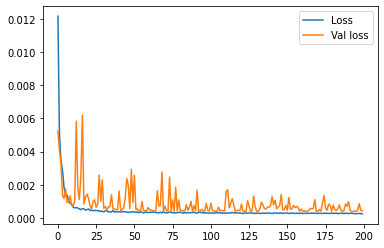

In [ ]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val loss")

plt.legend()
plt.show()

In [ ]:
y_pred = model.predict([X_test_ohlcv, X_test_embbeded])
# y_pred = scaler1.inverse_transform(y_pred)
# y_test = scaler1.inverse_transform(y_test)
r2_score(y_test, y_pred)

5/5 [==============================] - 1s 4ms/step


0.9547208810681043

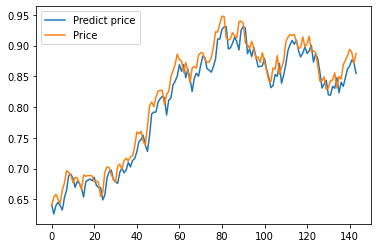

In [ ]:
plt.plot(y_pred, label = "Predict price")
plt.plot(y_test, label = "Price")
plt.legend()
plt.show()